# TSNE Analysis

In [1]:
import sys
sys.path.append('/home/hamid/Desktop/EnsembleTools')

In [2]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import *

ens_codes = [

    Ensemble('PED00156e001', database='ped'),
    Ensemble('PED00157e001', database='ped'),
    Ensemble('PED00158e001', database='ped') 
]
data_dir = '/home/hamid/PED_Data_analysis/nikola'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories()

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x70960573cb10>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x7096064e6010>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x7096064dea10>}

## Download from Atlas and Load Data

In [3]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00156e001 trajectory.
50 conformations sampled from PED00157e001 trajectory.
50 conformations sampled from PED00158e001 trajectory.


{'PED00156e001': <mdtraj.Trajectory with 50 frames, 941 atoms, 59 residues, without unitcells at 0x70964c728750>,
 'PED00157e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x7096064cf510>,
 'PED00158e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x7096067a9090>}

## Featurization

In [4]:
analysis.extract_features(featurization='ca_dist')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (50, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (50, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (50, 1653)
Feature names: ['MET1-ALA3', 'MET1-ILE4', 'MET1-ALA5', 'MET1-LYS6', 'MET1-HIS7', 'MET1-ASP8', 'MET1-PHE9', 'MET1-SER10', 'MET1-ALA11', 'MET1-THR12', 'MET1-ALA13', 'MET1-ASP14', 'MET1-ASP15', 'MET1-GLU16', 'MET1-LEU17', 'MET1-SER18', 'MET1-PHE19', 'MET1-ARG20', 'MET1-LYS21', 'MET1-THR22', 'MET1-GLN23', 'MET1-ILE24', 'MET1-LEU25', 'MET1-LYS26', 'MET1-ILE27', 'MET1-LEU28', 'MET1-ASN29', 'MET1-MET30', 'MET1-GLU31', 'MET1-ASP32', 'MET1-ASP33', 'MET1-SER34', 'MET1-ASN35', 'MET1-TRP36', 'MET1-TYR37', 'MET1-ARG38', 'MET1-ALA39', 'MET1-GLU40', 'MET1-LEU41', 'MET1-ASP42', 'MET1-GLY43', 'MET1-LYS44', 'MET1-GLU45', 'MET1-GLY46', 'MET1-LEU47', 'MET1-ILE48', 'MET1-PRO49', 'MET1-SER50', 'MET1-ASN51', 'MET1-TYR52', 

{'PED00156e001': array([[0.5687673 , 0.5285205 , 0.6456276 , ..., 0.66305345, 0.96905786,
         0.6745613 ],
        [0.58550507, 0.8509589 , 1.0959796 , ..., 0.5325418 , 0.539001  ,
         0.63170296],
        [0.61816657, 0.5848142 , 0.5319582 , ..., 0.5708492 , 0.8553404 ,
         0.5177114 ],
        ...,
        [0.62179464, 0.8957052 , 1.2247868 , ..., 0.60477006, 0.9569237 ,
         0.66563815],
        [0.6663374 , 0.93249786, 1.300304  , ..., 0.5492629 , 0.6179835 ,
         0.6371168 ],
        [0.57238317, 0.68313426, 0.9524447 , ..., 0.50012326, 0.44726157,
         0.58926785]], dtype=float32),
 'PED00157e001': array([[0.5080859 , 0.67766374, 0.88780785, ..., 0.71410066, 0.8800467 ,
         0.6577556 ],
        [0.61922514, 0.89435095, 0.93977153, ..., 0.7174825 , 0.85039765,
         0.5540449 ],
        [0.59928095, 0.7604963 , 1.0995255 , ..., 0.62417346, 0.77708054,
         0.56702864],
        ...,
        [0.5140302 , 0.4622924 , 0.6651751 , ..., 0.5530799 ,

## Dimensionality Reduction

In [5]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 20,  50, 100], circular=False, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (150, 1653)
tsne is running...
Best Perplexity: 100
Best Number of Clusters: 4
Silhouette Score Low Dimensional: 0.50396425
Silhouette Score High Dimensional: 0.29182327
Silhouette Score Product 0.14706849


array([[ 8.27532   ,  2.2361357 ],
       [ 6.318415  , -0.4294145 ],
       [ 6.289388  , -0.05551816],
       [ 6.286375  , -0.14872915],
       [ 6.671764  , -0.08882248],
       [ 6.625122  , -0.41031504],
       [10.305081  ,  2.618228  ],
       [ 6.340727  , -0.21013139],
       [ 6.4239464 , -0.05192661],
       [ 6.1813226 ,  0.03116161],
       [10.392733  ,  2.7419603 ],
       [ 9.277212  ,  1.554272  ],
       [ 6.448775  ,  0.6920828 ],
       [ 6.2616177 ,  0.28532887],
       [10.226814  ,  2.4655333 ],
       [10.37357   ,  2.6047356 ],
       [ 9.047119  ,  1.478578  ],
       [ 6.5525002 , -0.35413295],
       [10.323682  ,  2.3638837 ],
       [ 9.011322  ,  1.0480171 ],
       [ 9.120744  ,  1.4731957 ],
       [ 8.7214775 ,  1.5608418 ],
       [ 7.7020674 ,  0.5240724 ],
       [ 7.5091853 ,  0.14312929],
       [ 9.069931  ,  1.8125415 ],
       [ 6.4991064 , -0.1686687 ],
       [10.239872  ,  2.1504333 ],
       [10.256021  ,  1.9483533 ],
       [ 9.542697  ,

## Analysis

In [6]:
from matplotlib import pyplot as plt
from dpet.visualization import Visualization


vis = Visualization(analysis)




In [7]:
analysis.get_features('phi_psi')

{'PED00156e001': array([[-1.0514201 , -1.2517244 , -1.3804163 , ...,  1.9285852 ,
          2.7286372 ,  2.403263  ],
        [-1.3948162 , -2.7970872 , -2.1043153 , ...,  2.10606   ,
         -0.5932995 , -1.2692754 ],
        [-2.1873307 , -1.2105315 , -1.6749195 , ...,  1.9040998 ,
          1.0738877 ,  0.6134716 ],
        ...,
        [-2.2073655 , -1.4585584 , -2.3322067 , ..., -0.6513363 ,
         -1.0166417 ,  2.075375  ],
        [-1.6637403 , -1.6206732 , -1.7940581 , ..., -0.19010225,
          0.6998877 ,  1.7117194 ],
        [-1.3756931 , -1.9858394 , -1.2259734 , ..., -0.51324004,
         -0.776476  ,  1.6189235 ]], dtype=float32),
 'PED00157e001': array([[-1.0641882 , -1.2343924 , -1.813927  , ..., -2.9098735 ,
         -3.0744824 ,  2.7964265 ],
        [ 3.0242426 , -1.2952259 , -1.1229024 , ...,  2.4418864 ,
         -2.897522  , -0.66710645],
        [-0.9922045 , -0.999937  , -1.9366667 , ...,  2.9987833 ,
          0.18309718,  0.15849403],
        ...,
       

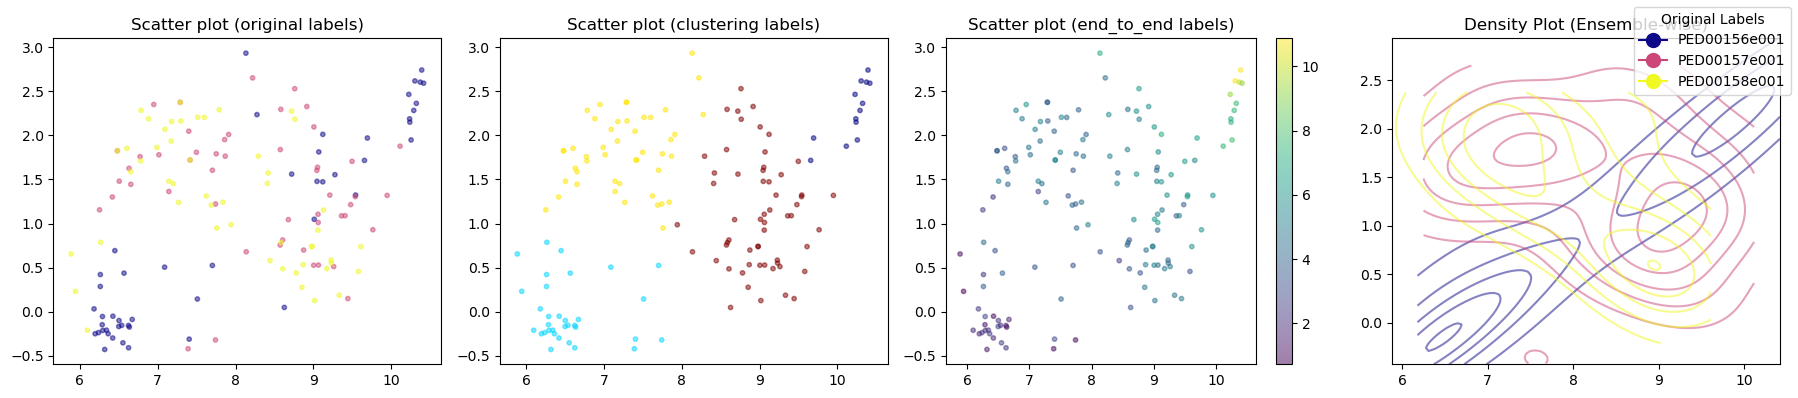

In [8]:
vis.dimensionality_reduction_scatter(color_by="end_to_end", save=False, kde_by_ensemble=True, plotly=True)